# Session 3 — Sentence-Level Analysis
## Measure 2: Readability Scores
This notebook computes classic readability formulas for **English** such as:
- Flesch Reading Ease
- Flesch-Kincaid Grade Level


In [15]:
import re
import matplotlib.pyplot as plt
from pathlib import Path

Path("../results").mkdir(exist_ok=True)
print("✓ Results directory created/verified")

def load_book(filepath):
    """
    Load and clean book text from Project Gutenberg files.

    This function:
    1. Opens and reads the text file
    2. Removes Project Gutenberg header/footer boilerplate
    3. Returns clean text ready for analysis

    Args:
        filepath: path to the .txt file

    Returns:
        Cleaned text as a string
    """
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # Remove Project Gutenberg headers/footers
    # Most Gutenberg files have "*** START OF" or "CHAPTER I" markers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif 'BOOK I' in text:
        start = text.find('BOOK I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]  # Skip past the marker line

    # Remove endings (license information)
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]

    return text.strip()

# Load both Homer epic poems
iliad_text = load_book('../data/iliad.txt')
odyssey_text = load_book('../data/odyssey.txt')

# Print confirmation and basic stats
print(f"The Iliad loaded: {len(iliad_text):,} characters")
print(f"The Odyssey loaded: {len(odyssey_text):,} characters")

✓ Results directory created/verified
The Iliad loaded: 590,466 characters
The Odyssey loaded: 563,171 characters


In [16]:
def count_syllables(word):
    """
    Simple syllable counter for English words.

    This is a heuristic (rule-based) approach:
    1. Counts groups of vowels (a, e, i, o, u, y)
    2. Adjusts for silent 'e' at the end
    3. Ensures at least 1 syllable per word

    Not perfect, but good enough for readability metrics.

    Args:
        word: a single word (string)

    Returns:
        Estimated number of syllables (integer)
    """
    word = word.lower()
    # Remove non-alphabetic characters (punctuation, numbers)
    word = re.sub(r'[^a-z]', '', word)
    if not word:
        return 1

    # Count vowel groups (consecutive vowels count as one syllable)
    # Example: "beautiful" has "eau" (1) + "i" (1) + "u" (1) = 3 syllables
    syllables = len(re.findall(r'[aeiouy]+', word))

    # Adjust for silent 'e' at the end (common in English)
    # Example: "hope" should be 1 syllable, not 2
    if word.endswith('e') and syllables > 1:
        syllables -= 1

    # Every word has at least one syllable
    return max(1, syllables)


In [17]:
def calculate_readability(text, book_name):
    """
    Calculate readability scores for a given text.

    This function computes two standard readability metrics:

    1. Flesch Reading Ease (0-100 scale):
       - 90-100: Very Easy (5th grade)
       - 60-70: Standard (8th-9th grade)
       - 0-30: Very Difficult (college graduate)
       Formula: 206.835 - 1.015*(words/sentences) - 84.6*(syllables/words)

    2. Flesch-Kincaid Grade Level:
       - Corresponds to US grade level (e.g., 8.5 = 8th grade)
       Formula: 0.39*(words/sentences) + 11.8*(syllables/words) - 15.59

    Args:
        text: the full text to analyze
        book_name: name for display purposes

    Returns:
        Tuple of (flesch_ease_score, flesch_grade_level)
    """
    # Split text into sentences
    # We split on periods, exclamation marks, and question marks followed by space
    sentences = re.split(r'[.!?]+\s+', text.strip())
    # Filter out empty or very short sentences (less than 3 words)
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]

    # Extract all words (alphabetic characters only, including apostrophes)
    # Example: "don't" stays as one word
    words = re.findall(r"[A-Za-z']+", text)

    # Count total syllables in all words
    syllables = sum(count_syllables(w) for w in words)

    # Basic counts
    num_sentences = len(sentences)
    num_words = len(words)

    # Calculate Flesch Reading Ease
    # Higher score = easier to read
    flesch_ease = 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (syllables / num_words)

    # Calculate Flesch-Kincaid Grade Level
    # Higher grade = more complex text
    flesch_grade = 0.39 * (num_words / num_sentences) + 11.8 * (syllables / num_words) - 15.59

    # Print detailed results
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Sentences: {num_sentences:,}")
    print(f"Words: {num_words:,}")
    print(f"Syllables: {syllables:,}")
    print(f"Avg words per sentence: {num_words/num_sentences:.2f}")
    print(f"Avg syllables per word: {syllables/num_words:.2f}")
    print(f"\nFlesch Reading Ease: {flesch_ease:.2f}")
    print(f"  Interpretation: ", end="")

    # Interpret the Flesch Reading Ease score
    if flesch_ease >= 90:
        print("Very Easy (5th grade)")
    elif flesch_ease >= 80:
        print("Easy (6th grade)")
    elif flesch_ease >= 70:
        print("Fairly Easy (7th grade)")
    elif flesch_ease >= 60:
        print("Standard (8th-9th grade)")
    elif flesch_ease >= 50:
        print("Fairly Difficult (10th-12th grade)")
    elif flesch_ease >= 30:
        print("Difficult (College)")
    else:
        print("Very Difficult (College graduate)")

    print(f"\nFlesch-Kincaid Grade Level: {flesch_grade:.2f}")
    print(f"  Interpretation: Suitable for grade {flesch_grade:.0f} and above")

    return flesch_ease, flesch_grade

# Calculate readability for both Homer epics (entire books)
iliad_ease, iliad_grade = calculate_readability(iliad_text, "The Iliad (Complete)")
odyssey_ease, odyssey_grade = calculate_readability(odyssey_text, "The Odyssey (Complete)")


The Iliad (Complete)
Sentences: 3,092
Words: 111,771
Syllables: 145,752
Avg words per sentence: 36.15
Avg syllables per word: 1.30

Flesch Reading Ease: 59.82
  Interpretation: Fairly Difficult (10th-12th grade)

Flesch-Kincaid Grade Level: 13.90
  Interpretation: Suitable for grade 14 and above

The Odyssey (Complete)
Sentences: 2,881
Words: 108,907
Syllables: 140,260
Avg words per sentence: 37.80
Avg syllables per word: 1.29

Flesch Reading Ease: 59.51
  Interpretation: Fairly Difficult (10th-12th grade)

Flesch-Kincaid Grade Level: 14.35
  Interpretation: Suitable for grade 14 and above


In [18]:
def split_into_books(text):
    """
    Split an epic poem into individual books (chapters).

    Homer's epics are divided into "Books" (BOOK I, BOOK II, etc.)
    This function finds those markers and splits the text.

    Args:
        text: the complete epic text

    Returns:
        List of tuples: [(book_number, book_text), ...]
    """
    # Find all "BOOK" markers (case insensitive)
    # Pattern matches: BOOK I, BOOK II, BOOK III, etc.
    book_pattern = re.compile(r'BOOK\s+([IVXLCDM]+)', re.IGNORECASE)

    # Find all matches with their positions
    matches = list(book_pattern.finditer(text))

    if not matches:
        print("  No BOOK markers found - text may use different formatting")
        return []

    books = []
    for i, match in enumerate(matches):
        book_num = match.group(1)  # Roman numeral
        start_pos = match.end()

        # End position is either the start of next book, or end of text
        if i < len(matches) - 1:
            end_pos = matches[i + 1].start()
        else:
            end_pos = len(text)

        book_text = text[start_pos:end_pos].strip()

        # Only include if book has substantial content (at least 500 characters)
        if len(book_text) > 500:
            books.append((book_num, book_text))

    return books


def analyze_books_individually(text, epic_name):
    """
    Analyze readability of each individual book within an epic.

    Args:
        text: complete epic text
        epic_name: name of the epic for display

    Returns:
        List of dictionaries with book analysis results
    """
    print(f"\n{'='*70}")
    print(f"ANALYZING INDIVIDUAL BOOKS IN {epic_name.upper()}")
    print(f"{'='*70}")

    books = split_into_books(text)

    if not books:
        return []

    print(f"Found {len(books)} books in {epic_name}")

    results = []

    for book_num, book_text in books:
        # Split into sentences
        sentences = re.split(r'[.!?]+\s+', book_text.strip())
        sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]

        # Extract words
        words = re.findall(r"[A-Za-z']+", book_text)

        # Count syllables
        syllables = sum(count_syllables(w) for w in words)

        num_sentences = len(sentences)
        num_words = len(words)

        if num_sentences == 0 or num_words == 0:
            continue

        # Calculate scores
        flesch_ease = 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (syllables / num_words)
        flesch_grade = 0.39 * (num_words / num_sentences) + 11.8 * (syllables / num_words) - 15.59

        results.append({
            'book': book_num,
            'ease': flesch_ease,
            'grade': flesch_grade,
            'words': num_words,
            'sentences': num_sentences
        })

        print(f"\nBook {book_num}: Ease={flesch_ease:.1f}, Grade={flesch_grade:.1f} ({num_words:,} words)")

    return results


# Analyze individual books for both epics
print("\n" + "="*70)
print("DETAILED BOOK-BY-BOOK ANALYSIS")
print("="*70)

iliad_books = analyze_books_individually(iliad_text, "The Iliad")
odyssey_books = analyze_books_individually(odyssey_text, "The Odyssey")


DETAILED BOOK-BY-BOOK ANALYSIS

ANALYZING INDIVIDUAL BOOKS IN THE ILIAD
Found 18 books in The Iliad

Book I: Ease=65.4, Grade=11.9 (5,834 words)

Book II: Ease=64.3, Grade=11.3 (7,948 words)

Book III: Ease=61.9, Grade=13.1 (4,039 words)

Book IV: Ease=60.0, Grade=13.8 (5,042 words)

Book V: Ease=63.2, Grade=12.8 (8,591 words)

Book VI: Ease=60.0, Grade=13.7 (4,989 words)

Book VII: Ease=57.9, Grade=14.6 (4,404 words)

Book VIII: Ease=61.1, Grade=13.5 (5,286 words)

Book IX: Ease=63.5, Grade=12.8 (6,900 words)

Book X: Ease=62.1, Grade=13.4 (5,510 words)

Book XI: Ease=55.5, Grade=15.7 (8,500 words)

Book XII: Ease=55.3, Grade=15.9 (4,764 words)

Book XIII: Ease=53.4, Grade=16.1 (8,423 words)

Book XIV: Ease=54.7, Grade=15.8 (5,240 words)

Book XV: Ease=60.0, Grade=13.9 (7,420 words)

Book XVI: Ease=58.3, Grade=14.4 (8,933 words)

Book XVII: Ease=55.2, Grade=15.7 (7,298 words)

Book XVIII: Ease=57.5, Grade=14.9 (2,614 words)

ANALYZING INDIVIDUAL BOOKS IN THE ODYSSEY
Found 22 books in

✓ Saved: ../results/readability_overview.png


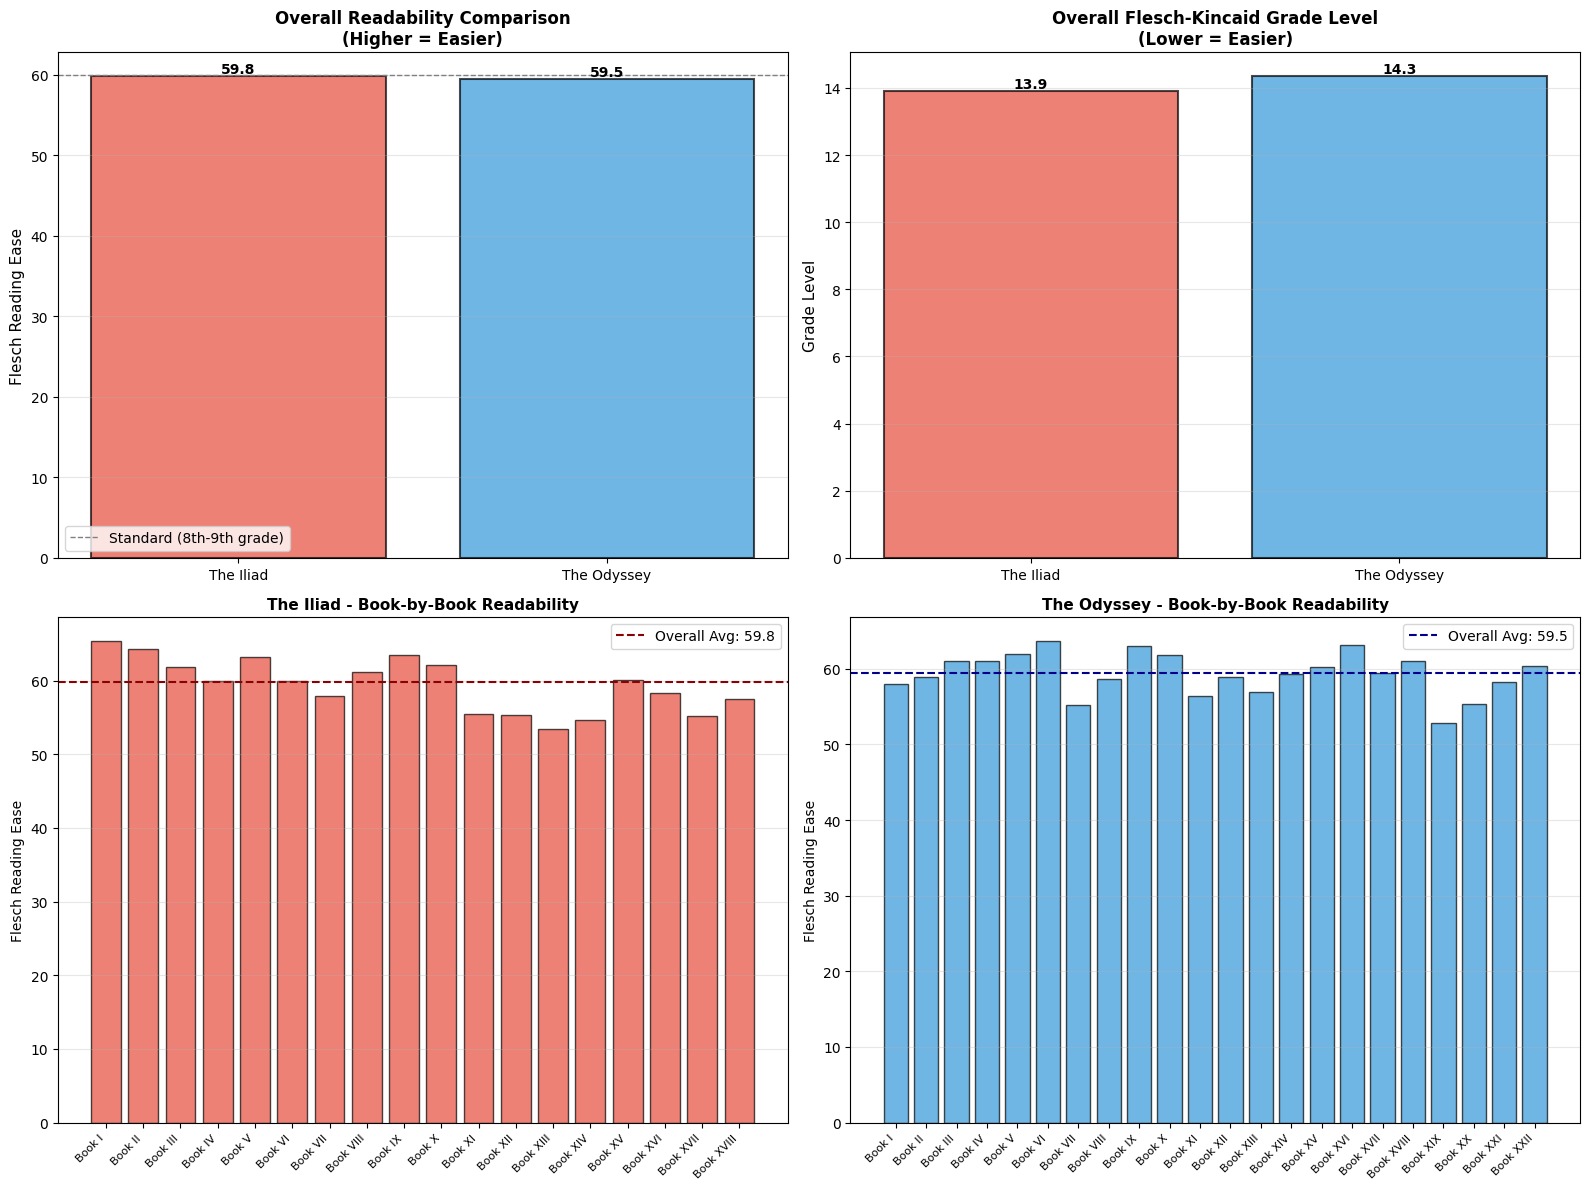

In [19]:
# Create a larger figure with FOUR subplots (2 rows, 2 columns)
fig = plt.figure(figsize=(16, 12))

# ---- TOP LEFT: Overall Flesch Reading Ease comparison ----
ax1 = plt.subplot(2, 2, 1)
books = ['The Iliad', 'The Odyssey']
ease_scores = [iliad_ease, odyssey_ease]
colors_main = ['#e74c3c', '#3498db']  # Red for Iliad, Blue for Odyssey

bars1 = ax1.bar(books, ease_scores, color=colors_main, edgecolor='black',
                linewidth=1.5, alpha=0.7)

ax1.set_ylabel('Flesch Reading Ease', fontsize=11)
ax1.set_title('Overall Readability Comparison\n(Higher = Easier)',
              fontsize=12, fontweight='bold')
ax1.axhline(y=60, color='gray', linestyle='--', linewidth=1,
            label='Standard (8th-9th grade)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

# ---- TOP RIGHT: Overall Flesch-Kincaid Grade Level comparison ----
ax2 = plt.subplot(2, 2, 2)
grade_scores = [iliad_grade, odyssey_grade]

bars2 = ax2.bar(books, grade_scores, color=colors_main, edgecolor='black',
                linewidth=1.5, alpha=0.7)

ax2.set_ylabel('Grade Level', fontsize=11)
ax2.set_title('Overall Flesch-Kincaid Grade Level\n(Lower = Easier)',
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

# ---- BOTTOM LEFT: Book-by-book Flesch Reading Ease for ILIAD ----
ax3 = plt.subplot(2, 2, 3)
if iliad_books:
    iliad_book_nums = [f"Book {b['book']}" for b in iliad_books]
    iliad_ease_scores = [b['ease'] for b in iliad_books]

    bars3 = ax3.bar(range(len(iliad_books)), iliad_ease_scores,
                    color='#e74c3c', edgecolor='black', linewidth=1, alpha=0.7)
    ax3.set_xticks(range(len(iliad_books)))
    ax3.set_xticklabels(iliad_book_nums, rotation=45, ha='right', fontsize=8)
    ax3.set_ylabel('Flesch Reading Ease', fontsize=10)
    ax3.set_title('The Iliad - Book-by-Book Readability',
                  fontsize=11, fontweight='bold')
    ax3.axhline(y=iliad_ease, color='darkred', linestyle='--', linewidth=1.5,
                label=f'Overall Avg: {iliad_ease:.1f}')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')

# ---- BOTTOM RIGHT: Book-by-book Flesch Reading Ease for ODYSSEY ----
ax4 = plt.subplot(2, 2, 4)
if odyssey_books:
    odyssey_book_nums = [f"Book {b['book']}" for b in odyssey_books]
    odyssey_ease_scores = [b['ease'] for b in odyssey_books]

    bars4 = ax4.bar(range(len(odyssey_books)), odyssey_ease_scores,
                    color='#3498db', edgecolor='black', linewidth=1, alpha=0.7)
    ax4.set_xticks(range(len(odyssey_books)))
    ax4.set_xticklabels(odyssey_book_nums, rotation=45, ha='right', fontsize=8)
    ax4.set_ylabel('Flesch Reading Ease', fontsize=10)
    ax4.set_title('The Odyssey - Book-by-Book Readability',
                  fontsize=11, fontweight='bold')
    ax4.axhline(y=odyssey_ease, color='darkblue', linestyle='--', linewidth=1.5,
                label=f'Overall Avg: {odyssey_ease:.1f}')
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("../results/readability_overview.png", dpi=300, bbox_inches='tight')
print("✓ Saved: ../results/readability_overview.png")
plt.show()

✓ Saved: ../results/readability_easiest_hardest.png


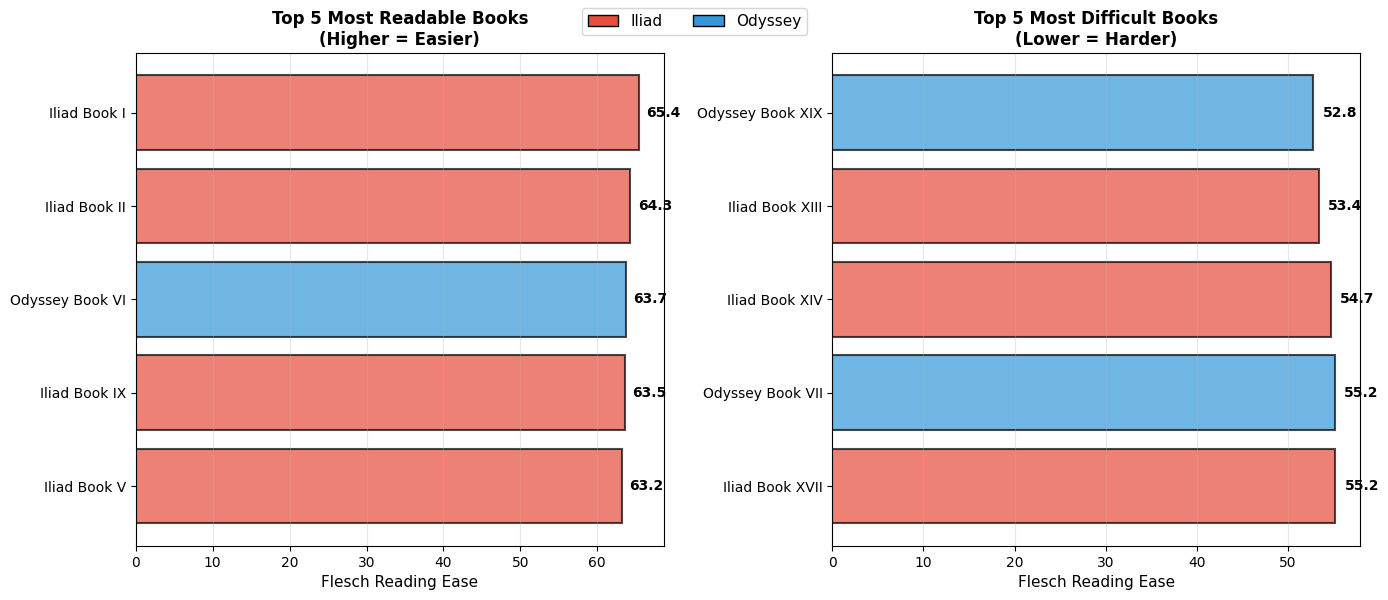


TOP 5 EASIEST BOOKS (Most Readable)
1. Iliad Book I: Ease = 65.4
2. Iliad Book II: Ease = 64.3
3. Odyssey Book VI: Ease = 63.7
4. Iliad Book IX: Ease = 63.5
5. Iliad Book V: Ease = 63.2

TOP 5 HARDEST BOOKS (Most Difficult)
1. Odyssey Book XIX: Ease = 52.8
2. Iliad Book XIII: Ease = 53.4
3. Iliad Book XIV: Ease = 54.7
4. Odyssey Book VII: Ease = 55.2
5. Iliad Book XVII: Ease = 55.2

OVERALL SUMMARY
Both Homeric epics show similar readability levels.
The Iliad: Flesch Ease = 59.8, Grade Level = 13.9
The Odyssey: Flesch Ease = 59.5, Grade Level = 14.3

These scores reflect:
- Epic poetry's elevated language and complex sentence structures
- Translation style (formal, literary English)
- Long, descriptive passages typical of oral tradition

THE ILIAD - BOOK-BY-BOOK VARIATION
Most readable book: Book I (Ease: 65.4)
Most difficult book: Book XIII (Ease: 53.4)
Readability variation: 12.0 points
This shows high variation across books

THE ODYSSEY - BOOK-BY-BOOK VARIATION
Most readable book: 

In [20]:
# Create a new figure for hardest/easiest comparison
fig2, (ax_easy, ax_hard) = plt.subplots(1, 2, figsize=(14, 6))

# Find easiest and hardest books from BOTH epics combined
all_books = []
for book in iliad_books:
    all_books.append({
        'epic': 'Iliad',
        'book': book['book'],
        'ease': book['ease'],
        'label': f"Iliad Book {book['book']}"
    })
for book in odyssey_books:
    all_books.append({
        'epic': 'Odyssey',
        'book': book['book'],
        'ease': book['ease'],
        'label': f"Odyssey Book {book['book']}"
    })

if all_books:
    # Sort by ease score
    all_books_sorted = sorted(all_books, key=lambda x: x['ease'], reverse=True)

    # Get top 5 easiest and top 5 hardest
    easiest_5 = all_books_sorted[:5]
    hardest_5 = all_books_sorted[-5:][::-1]  # Reverse so hardest is on left

    # ---- LEFT: Top 5 EASIEST books ----
    easy_labels = [b['label'] for b in easiest_5]
    easy_scores = [b['ease'] for b in easiest_5]
    easy_colors = ['#e74c3c' if b['epic'] == 'Iliad' else '#3498db' for b in easiest_5]

    bars_easy = ax_easy.barh(easy_labels, easy_scores, color=easy_colors,
                              edgecolor='black', linewidth=1.5, alpha=0.7)
    ax_easy.set_xlabel('Flesch Reading Ease', fontsize=11)
    ax_easy.set_title('Top 5 Most Readable Books\n(Higher = Easier)',
                      fontsize=12, fontweight='bold')
    ax_easy.invert_yaxis()  # Highest at top
    ax_easy.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, (bar, score) in enumerate(zip(bars_easy, easy_scores)):
        ax_easy.text(score + 1, i, f'{score:.1f}',
                     va='center', fontsize=10, fontweight='bold')

    # ---- RIGHT: Top 5 HARDEST books ----
    hard_labels = [b['label'] for b in hardest_5]
    hard_scores = [b['ease'] for b in hardest_5]
    hard_colors = ['#e74c3c' if b['epic'] == 'Iliad' else '#3498db' for b in hardest_5]

    bars_hard = ax_hard.barh(hard_labels, hard_scores, color=hard_colors,
                              edgecolor='black', linewidth=1.5, alpha=0.7)
    ax_hard.set_xlabel('Flesch Reading Ease', fontsize=11)
    ax_hard.set_title('Top 5 Most Difficult Books\n(Lower = Harder)',
                      fontsize=12, fontweight='bold')
    ax_hard.invert_yaxis()  # Hardest at top
    ax_hard.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, (bar, score) in enumerate(zip(bars_hard, hard_scores)):
        ax_hard.text(score + 1, i, f'{score:.1f}',
                     va='center', fontsize=10, fontweight='bold')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e74c3c', edgecolor='black', label='Iliad'),
        Patch(facecolor='#3498db', edgecolor='black', label='Odyssey')
    ]
    fig2.legend(handles=legend_elements, loc='upper center',
                ncol=2, fontsize=11, frameon=True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for legend
    plt.savefig("../results/readability_easiest_hardest.png", dpi=300, bbox_inches='tight')
    print("✓ Saved: ../results/readability_easiest_hardest.png")
    plt.show()

    print("\n" + "="*70)
    print("TOP 5 EASIEST BOOKS (Most Readable)")
    print("="*70)
    for i, book in enumerate(easiest_5, 1):
        print(f"{i}. {book['label']}: Ease = {book['ease']:.1f}")

    print("\n" + "="*70)
    print("TOP 5 HARDEST BOOKS (Most Difficult)")
    print("="*70)
    for i, book in enumerate(hardest_5, 1):
        print(f"{i}. {book['label']}: Ease = {book['ease']:.1f}")

    print("\n" + "="*70)
print("OVERALL SUMMARY")
print("="*70)
print("Both Homeric epics show similar readability levels.")
print(f"The Iliad: Flesch Ease = {iliad_ease:.1f}, Grade Level = {iliad_grade:.1f}")
print(f"The Odyssey: Flesch Ease = {odyssey_ease:.1f}, Grade Level = {odyssey_grade:.1f}")
print("\nThese scores reflect:")
print("- Epic poetry's elevated language and complex sentence structures")
print("- Translation style (formal, literary English)")
print("- Long, descriptive passages typical of oral tradition")

# Book-by-book insights
if iliad_books:
    print("\n" + "="*70)
    print("THE ILIAD - BOOK-BY-BOOK VARIATION")
    print("="*70)
    iliad_ease_vals = [b['ease'] for b in iliad_books]
    easiest_iliad = max(iliad_books, key=lambda x: x['ease'])
    hardest_iliad = min(iliad_books, key=lambda x: x['ease'])

    print(f"Most readable book: Book {easiest_iliad['book']} (Ease: {easiest_iliad['ease']:.1f})")
    print(f"Most difficult book: Book {hardest_iliad['book']} (Ease: {hardest_iliad['ease']:.1f})")
    print(f"Readability variation: {max(iliad_ease_vals) - min(iliad_ease_vals):.1f} points")
    print(f"This shows {'high' if max(iliad_ease_vals) - min(iliad_ease_vals) > 10 else 'moderate'} variation across books")

if odyssey_books:
    print("\n" + "="*70)
    print("THE ODYSSEY - BOOK-BY-BOOK VARIATION")
    print("="*70)
    odyssey_ease_vals = [b['ease'] for b in odyssey_books]
    easiest_odyssey = max(odyssey_books, key=lambda x: x['ease'])
    hardest_odyssey = min(odyssey_books, key=lambda x: x['ease'])

    print(f"Most readable book: Book {easiest_odyssey['book']} (Ease: {easiest_odyssey['ease']:.1f})")
    print(f"Most difficult book: Book {hardest_odyssey['book']} (Ease: {hardest_odyssey['ease']:.1f})")
    print(f"Readability variation: {max(odyssey_ease_vals) - min(odyssey_ease_vals):.1f} points")
    print(f"This shows {'high' if max(odyssey_ease_vals) - min(odyssey_ease_vals) > 10 else 'moderate'} variation across books")

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print("Book-by-book variation reveals:")
print("- Some books may contain more battle descriptions (complex, dense)")
print("- Other books may have more dialogue (simpler, more readable)")
print("- Books with catalogues or lists tend to score differently")
print("- This variation reflects the episodic nature of oral epic poetry")
print("\nNote: Readability scores are designed for modern prose.")
print("Epic poetry naturally scores as 'difficult' due to its formal style.")

print("\n" + "="*70)
print("EXPORT SUMMARY")
print("="*70)
print("All visualizations have been saved to ../results/:")
print("  1. readability_overview.png - Overall and book-by-book comparison")
print("  2. readability_easiest_hardest.png - Top 5 easiest/hardest books")
print("✓ Analysis complete!")